# Multivariate Linear Regression

> When more than one feature is used in a linear regression model.
>> The hypothesis in this case is that the prediction function will be of the form: $p(x) = a0 + a1x1 + a2x2 + a3x3 + ...$ ; where x1, x2, x3 ... are the features of the dataset and the parameters a0, a1, a2, ... are the constants we want to discover .


## Notation

> Assuming x0 = 1, x1, x2, x3, ... compose a vector called x; and a0, a1, a2, ... a vector called a, the prediction function can be writen as $p(x) = aTx$, where aT is the transpose of the vector a.

## Gradient Descent

> The algorithm used to update the parameters in this case is analogous to the one used in linear regression and is given by: $aj := aj - l\frac{1}{m}\sum_{i=1}^{m}(p(x^{(i)})-y^{(i)})xj^{(i)}$, simultaneously updated.

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### Creating a dataframe
> I used the numpy library to create three arrays, then joined them in a dataframe with the pandas library. The arrays refer to the Systolic Blood Pressure Data, available at http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html. 

In [195]:
y = np.array([132, 143, 153, 162, 154, 168, 137, 149, 159, 128, 166])
len(y)

11

In [196]:
x1 = np.array([52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72])
len(x1)

11

In [197]:
x2 = np.array([173, 184, 194, 211, 196, 220, 188, 188, 207, 167, 217])
len(x2)

11

In [198]:
data = pd.DataFrame({'blood_pressure' : y, 'age' : x1, 'weight' : x2})
data

,age,blood_pressure,weight
0,52,132,173
1,59,143,184
2,67,153,194
3,73,162,211
4,64,154,196
5,74,168,220
6,54,137,188
7,61,149,188
8,65,159,207
9,46,128,167


> Assuming the variable to be predicted is the blood pressure, given the individual's age and weight, the prediction function will be given in relation to x1 and x2.
> The optimization process is analogous to the one used for the simpler linear regression model with one variable.

In [199]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
print (a, b, c)

-0.2682420613218602 -1.0875018806933872 -0.02467154861248827


In [200]:
p = a*x1 + b*x2 + c
p

array([-202.1110841 , -215.95129921, -228.97225451, -249.06923885,
       -230.34253209, -259.12499784, -218.96009643, -220.83779086,
       -242.57329484, -193.97662045, -255.32600807])

In [201]:
l = 0.000001
for i in range(0,10000):
    cost_var = p - y
    cost_ar = (cost_var)**2
    cost = 0
    for j in range(0,len(cost_ar)):
        cost = cost + cost_ar[j]
    print ('cost is', cost)
    cost_der_c_ar = (cost_var)
    cost_der_c = 0
    cost_der_a_ar = (cost_var)*x1
    cost_der_a = 0
    cost_der_b_ar = (cost_var)*x2
    cost_der_b = 0
    for k in range(0,len(cost_der_b_ar)):
        cost_der_b = cost_der_b + cost_der_b_ar[k]
        cost_der_a = cost_der_a + cost_der_a_ar[k]
        cost_der_c = cost_der_c + cost_der_c_ar[k]
   
    b = b - l*cost_der_b
    a = a - l*cost_der_a
    c = c - l*cost_der_c
    p = a*x1 + b*x2 + c
    
  

cost is 1591445.1619412918
cost is 455813.28858856735
cost is 130592.86878223048
cost is 37456.77047595388
cost is 10784.604843031217
cost is 3146.272766286588
cost is 958.8191627019803
cost is 332.3793214428347
cost is 152.98007716210745
cost is 101.6035962428546
cost is 86.89006739736341
cost is 82.67601561263552
cost is 81.46878722498627
cost is 81.12264819499931
cost is 81.02310667842318
cost is 80.994185494588
cost is 80.98548858303351
cost is 80.9825836014188
cost is 80.98133743883922
cost is 80.98056646163384
cost is 80.9799317026628
cost is 80.97933608902275
cost is 80.97875182108581
cost is 80.97817093759673
cost is 80.97759115857843
cost is 80.97701183105136
cost is 80.97643276797105
cost is 80.97585391572785
cost is 80.97527525892482
cost is 80.97469679310827
cost is 80.97411851695847
cost is 80.97354043005265
cost is 80.97296253222608
cost is 80.97238482338693
cost is 80.97180730346469
cost is 80.97122997239431
cost is 80.97065283011389
cost is 80.9700758765611
cost is 80.9

cost is 80.37353587906314
cost is 80.37315397990176
cost is 80.37277220531959
cost is 80.3723905552757
cost is 80.3720090297293
cost is 80.37162762863831
cost is 80.3712463519632
cost is 80.37086519966265
cost is 80.37048417169561
cost is 80.37010326802148
cost is 80.36972248859936
cost is 80.3693418333883
cost is 80.3689613023473
cost is 80.36858089543605
cost is 80.36820061261344
cost is 80.36782045383903
cost is 80.36744041907166
cost is 80.36706050827125
cost is 80.36668072139615
cost is 80.36630105840618
cost is 80.3659215192604
cost is 80.36554210391836
cost is 80.36516281233936
cost is 80.36478364448296
cost is 80.36440460030755
cost is 80.36402567977319
cost is 80.36364688283975
cost is 80.36326820946584
cost is 80.36288965961097
cost is 80.36251123323487
cost is 80.36213293029665
cost is 80.36175475075606
cost is 80.36137669457244
cost is 80.36099876170509
cost is 80.36062095211358
cost is 80.3602432657576
cost is 80.35986570259642
cost is 80.35948826258971
cost is 80.35911094

cost is 80.07021742850677
cost is 80.06993436283128
cost is 80.06965138926297
cost is 80.0693685077711
cost is 80.06908571832486
cost is 80.06880302089526
cost is 80.06852041545118
cost is 80.06823790196275
cost is 80.06795548039935
cost is 80.06767315073103
cost is 80.06739091292845
cost is 80.06710876695986
cost is 80.06682671279614
cost is 80.06654475040678
cost is 80.06626287976151
cost is 80.06598110083033
cost is 80.06569941358336
cost is 80.06541781799005
cost is 80.06513631402096
cost is 80.06485490164462
cost is 80.06457358083263
cost is 80.0642923515534
cost is 80.06401121377858
cost is 80.06373016747607
cost is 80.06344921261707
cost is 80.06316834917143
cost is 80.06288757710934
cost is 80.0626068963999
cost is 80.06232630701362
cost is 80.06204580892049
cost is 80.06176540209105
cost is 80.06148508649463
cost is 80.06120486210078
cost is 80.0609247288805
cost is 80.0606446868034
cost is 80.06036473584017
cost is 80.0600848759594
cost is 80.0598051071327
cost is 80.05952542

cost is 79.81495750011973
cost is 79.8147573454304
cost is 79.814557255607
cost is 79.81435723062806
cost is 79.8141572704722
cost is 79.81395737511846
cost is 79.81375754454575
cost is 79.8135577787319
cost is 79.81335807765659
cost is 79.81315844129789
cost is 79.812958869635
cost is 79.81275936264633
cost is 79.81255992031092
cost is 79.81236054260718
cost is 79.8121612295146
cost is 79.81196198101058
cost is 79.81176279707499
cost is 79.81156367768635
cost is 79.81136462282367
cost is 79.81116563246529
cost is 79.81096670659063
cost is 79.81076784517775
cost is 79.81056904820606
cost is 79.8103703156539
cost is 79.81017164750087
cost is 79.80997304372475
cost is 79.80977450430535
cost is 79.80957602922136
cost is 79.80937761845091
cost is 79.8091792719737
cost is 79.8089809897682
cost is 79.80878277181307
cost is 79.80858461808836
cost is 79.8083865285714
cost is 79.80818850324223
cost is 79.80799054207884
cost is 79.80779264506128
cost is 79.80759481216744
cost is 79.8073970433765

cost is 79.63348098657461
cost is 79.63333949557416
cost is 79.6331980501652
cost is 79.63305665033317
cost is 79.63291529606248
cost is 79.63277398733912
cost is 79.63263272414747
cost is 79.63249150647188
cost is 79.63235033429912
cost is 79.63220920761268
cost is 79.63206812639808
cost is 79.63192709064104
cost is 79.63178610032553
cost is 79.63164515543775
cost is 79.6315042559616
cost is 79.6313634018829
cost is 79.63122259318676
cost is 79.63108182985833
cost is 79.63094111188212
cost is 79.63080043924387
cost is 79.63065981192833
cost is 79.63051922992004
cost is 79.63037869320556
cost is 79.63023820176862
cost is 79.6300977555953
cost is 79.62995735467032
cost is 79.62981699897855
cost is 79.62967668850605
cost is 79.6295364232368
cost is 79.62939620315657
cost is 79.62925602825042
cost is 79.62911589850322
cost is 79.62897581390153
cost is 79.6288357744282
cost is 79.62869578006986
cost is 79.62855583081202
cost is 79.628415926639
cost is 79.62827606753626
cost is 79.628136253

cost is 79.51277321066982
cost is 79.51267048558903
cost is 79.51256779336283
cost is 79.51246513398141
cost is 79.51236250743311
cost is 79.51225991370757
cost is 79.51215735279324
cost is 79.5120548246803
cost is 79.51195232935765
cost is 79.51184986681452
cost is 79.51174743703965
cost is 79.51164504002307
cost is 79.51154267575323
cost is 79.51144034422043
cost is 79.51133804541294
cost is 79.51123577932029
cost is 79.51113354593203
cost is 79.51103134523682
cost is 79.51092917722428
cost is 79.51082704188387
cost is 79.51072493920442
cost is 79.5106228691756
cost is 79.51052083178644
cost is 79.51041882702576
cost is 79.51031685488431
cost is 79.51021491534974
cost is 79.51011300841242
cost is 79.51001113406114
cost is 79.50990929228487
cost is 79.50980748307353
cost is 79.50970570641671
cost is 79.5096039623025
cost is 79.50950225072162
cost is 79.50940057166237
cost is 79.50929892511421
cost is 79.50919731106698
cost is 79.5090957295093
cost is 79.50899418043079
cost is 79.50889

cost is 79.44175032928824
cost is 79.44167023944257
cost is 79.44159017501467
cost is 79.44151013599665
cost is 79.44143012238034
cost is 79.44135013415668
cost is 79.44127017131778
cost is 79.44119023385514
cost is 79.44111032176042
cost is 79.44103043502531
cost is 79.44095057364159
cost is 79.44087073760072
cost is 79.44079092689479
cost is 79.44071114151477
cost is 79.44063138145327
cost is 79.4405516467011
cost is 79.44047193725069
cost is 79.44039225309288
cost is 79.44031259421999
cost is 79.44023296062365
cost is 79.44015335229513
cost is 79.44007376922725
cost is 79.43999421140995
cost is 79.43991467883659
cost is 79.43983517149783
cost is 79.43975568938589
cost is 79.43967623249236
cost is 79.43959680080894
cost is 79.43951739432721
cost is 79.43943801303841
cost is 79.4393586569356
cost is 79.43927932600977
cost is 79.43920002025234
cost is 79.43912073965551
cost is 79.43904148421089
cost is 79.43896225390989
cost is 79.43888304874498
cost is 79.43880386870698
cost is 79.438

cost is 79.37307569664111
cost is 79.37301727433625
cost is 79.37295887033027
cost is 79.37290048461753
cost is 79.37284211719182
cost is 79.37278376804696
cost is 79.37272543717754
cost is 79.3726671245772
cost is 79.37260883023963
cost is 79.3725505541592
cost is 79.37249229632984
cost is 79.37243405674585
cost is 79.37237583540033
cost is 79.37231763228809
cost is 79.37225944740332
cost is 79.37220128073919
cost is 79.37214313229038
cost is 79.37208500205054
cost is 79.37202689001415
cost is 79.37196879617501
cost is 79.3719107205267
cost is 79.37185266306388
cost is 79.37179462378009
cost is 79.37173660266963
cost is 79.37167859972654
cost is 79.37162061494473
cost is 79.37156264831813
cost is 79.37150469984127
cost is 79.37144676950768
cost is 79.37138885731149
cost is 79.37133096324682
cost is 79.37127308730794
cost is 79.37121522948816
cost is 79.37115738978252
cost is 79.37109956818422
cost is 79.37104176468779
cost is 79.37098397928733
cost is 79.37092621197621
cost is 79.3708

cost is 79.32287150174261
cost is 79.32282867846949
cost is 79.32278586836988
cost is 79.3227430714405
cost is 79.32270028767613
cost is 79.32265751707268
cost is 79.32261475962606
cost is 79.32257201533207
cost is 79.32252928418573
cost is 79.32248656618329
cost is 79.32244386132083
cost is 79.32240116959295
cost is 79.32235849099541
cost is 79.32231582552508
cost is 79.32227317317661
cost is 79.32223053394621
cost is 79.32218790782903
cost is 79.32214529482142
cost is 79.32210269491857
cost is 79.32206010811637
cost is 79.32201753441079
cost is 79.32197497379701
cost is 79.32193242627072
cost is 79.32188989182815
cost is 79.32184737046458
cost is 79.3218048621758
cost is 79.32176236695742
cost is 79.32171988480596
cost is 79.3216774157157
cost is 79.32163495968351
cost is 79.32159251670464
cost is 79.3215500867745
cost is 79.32150766988939
cost is 79.32146526604481
cost is 79.32142287523628
cost is 79.32138049745981
cost is 79.3213381327109
cost is 79.32129578098561
cost is 79.321253

cost is 79.2859646685988
cost is 79.28593307549403
cost is 79.28590149187325
cost is 79.28586991773447
cost is 79.2858383530732
cost is 79.28580679788733
cost is 79.28577525217302
cost is 79.28574371592792
cost is 79.28571218914803
cost is 79.28568067183122
cost is 79.28564916397329
cost is 79.28561766557176
cost is 79.28558617662374
cost is 79.28555469712582
cost is 79.285523227075
cost is 79.28549176646747
cost is 79.28546031530163
cost is 79.28542887357281
cost is 79.28539744127909
cost is 79.28536601841688
cost is 79.28533460498267
cost is 79.28530320097386
cost is 79.28527180638754
cost is 79.28524042121995
cost is 79.28520904546875
cost is 79.28517767913017
cost is 79.2851463222015
cost is 79.28511497467973
cost is 79.28508363656177
cost is 79.28505230784397
cost is 79.28502098852384
cost is 79.28498967859817
cost is 79.28495837806376
cost is 79.28492708691768
cost is 79.28489580515648
cost is 79.28486453277739
cost is 79.28483326977742
cost is 79.28480201615346
cost is 79.284770

> Visually, the prediction function in this example equates to a plane that fits the data in a 3D space. This plane suggests all the points possible for a given set of independent vaiables (x1 and x2). If the problem at hand would involve 3 independent variables, the prediction function would equivalate to a 3D space contained in a 4D space and so on...

<IPython.core.display.Javascript object>


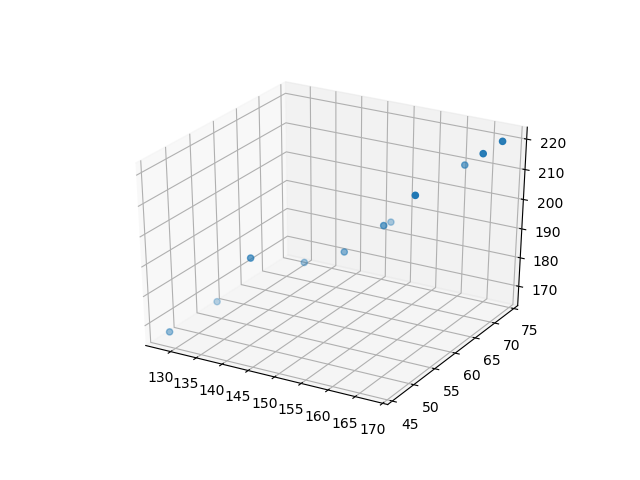

In [202]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, x1, x2)
plt.show()

### Prediction Example
> Suppose an individual is 67 years old and has a weight of 190 pounds, I defined a function that predicts the blood pressure according to the model as follow:

In [205]:
def bp(age, weight):
    blood = a*age + b*weight + c
    print ('The estimated blood pressure is', blood )
    return

In [206]:
bp(67, 190)

The estimated blood pressure is 148.46838662171328
